In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import yfinance as yf
import datetime

from valueinvesting import utils as utils

# 1. Load raw input
## Hardcoded block

In [2]:
evaluate_last_X_years = True
X=10
currency_pair = 'USD=X'
numbers_in_currency = 'USD'
share_name = 'ALB'

# 1.1 Calculate Share numbers from total distributed dividend (CFS) and dividend amount

# 1.2. Raw input statement data

In [3]:
route = f"../data/input/{share_name}_data.csv"
data = pd.read_csv(route, sep=';', parse_dates=['date', 'real_date'])
# replace -, extend missing 0-s, fix datatype
data = utils.replace_format_input(data)

In [4]:
owned_shares = pd.read_csv('../data/extras/owned_stocks.csv', sep=';', parse_dates=['date'])
owned_shares = owned_shares.loc[(owned_shares['stock'] == share_name) & (owned_shares['active'] == 'yes')]

## (OPTIONAL) Time Filtering - Last 7 years daat

In [5]:
if evaluate_last_X_years:
    data = data[data['date'] > datetime.datetime.today() - datetime.timedelta(days=X*366+93)]
    data = data.reset_index(drop=True)

data.head()

,date,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,curr_assets,goodwill,...,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,shares,real_date
0,2014-03-31,600,-404,196,57,524,428,420,1477,283,...,183,0,18,423,1053,1954,149,-24,112.15,2014-05-05
1,2014-06-30,605,-397,207,79,515,407,371,1526,265,...,185,0,378,816,686,1952,146,-23,112.15,2014-08-04
2,2014-09-30,642,-437,205,79,653,383,368,1509,252,...,206,0,368,812,684,1937,135,-30,112.15,2014-11-04
3,2014-12-31,599,-436,163,-21,2490,385,358,3348,243,...,232,0,711,1140,2223,3864,62,-34,112.15,2015-02-19
4,2015-03-31,692,-501,191,40,261,627,620,1686,2710,...,341,0,472,1457,3541,6685,46,-57,112.25,2015-05-05


## Calculate date when quaterly reports could be available

In [6]:
data = utils.calculate_real_date(data)

# 2. Filter out unnecesary columns

In [7]:
data = utils.filter_raw_data(data)
data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,intangible_assets,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex
35,2022-12-31,2023-02-19,117.19,2621,-1620,1001,839,1499,1191,2076,...,288,15457,2052,0,2,2741,3141,7474,952,-446
36,2023-03-31,2023-05-05,117.40,2580,-1304,1277,881,1587,1352,3181,...,285,17564,2771,0,2,3505,3159,8352,721,-416
37,2023-06-30,2023-08-04,117.40,2370,-1812,558,125,1600,1344,3659,...,274,19110,3052,0,6,4291,3393,9294,74,-504
38,2023-09-30,2023-11-04,117.40,2311,-2256,55,-150,1602,1179,3404,...,261,18883,2607,0,162,3941,3381,8986,629,-546
39,2023-12-31,2024-02-19,117.40,2356,-3049,-693,-1040,890,1213,2161,...,262,18271,2088,0,626,3560,3437,8858,-98,-684


## Pull historical average USD national currency rates and add to the dataframe

In [8]:
if currency_pair != 'USD=X':
    data['usd_nat_currency'] = utils.daily_price(
        ticker=currency_pair,
        end=data['date'],
        days_earlier=90
        )
else:
    data['usd_nat_currency'] = [1 for x in range(len(data))]

# drop rows, when USD rates wasn't available
data = data[data['usd_nat_currency'].notna()]

data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
35,2022-12-31,2023-02-19,117.19,2621,-1620,1001,839,1499,1191,2076,...,15457,2052,0,2,2741,3141,7474,952,-446,1
36,2023-03-31,2023-05-05,117.40,2580,-1304,1277,881,1587,1352,3181,...,17564,2771,0,2,3505,3159,8352,721,-416,1
37,2023-06-30,2023-08-04,117.40,2370,-1812,558,125,1600,1344,3659,...,19110,3052,0,6,4291,3393,9294,74,-504,1
38,2023-09-30,2023-11-04,117.40,2311,-2256,55,-150,1602,1179,3404,...,18883,2607,0,162,3941,3381,8986,629,-546,1
39,2023-12-31,2024-02-19,117.40,2356,-3049,-693,-1040,890,1213,2161,...,18271,2088,0,626,3560,3437,8858,-98,-684,1


## Convert USD values related to IS, BS, CFS to national currency

In [9]:
# convert columns into national currency if necessary
if numbers_in_currency == 'USD':
    data_nat_curr = utils.convert_national_currency(input_data=data, currency=data)
else:
    data_nat_curr = data.copy()
data_nat_curr.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
35,2022-12-31,2023-02-19,117.19,2621.0,-1620.0,1001.0,839.0,1499.0,1191.0,2076.0,...,15457.0,2052.0,0.0,2.0,2741.0,3141.0,7474.0,952.0,-446.0,1
36,2023-03-31,2023-05-05,117.40,2580.0,-1304.0,1277.0,881.0,1587.0,1352.0,3181.0,...,17564.0,2771.0,0.0,2.0,3505.0,3159.0,8352.0,721.0,-416.0,1
37,2023-06-30,2023-08-04,117.40,2370.0,-1812.0,558.0,125.0,1600.0,1344.0,3659.0,...,19110.0,3052.0,0.0,6.0,4291.0,3393.0,9294.0,74.0,-504.0,1
38,2023-09-30,2023-11-04,117.40,2311.0,-2256.0,55.0,-150.0,1602.0,1179.0,3404.0,...,18883.0,2607.0,0.0,162.0,3941.0,3381.0,8986.0,629.0,-546.0,1
39,2023-12-31,2024-02-19,117.40,2356.0,-3049.0,-693.0,-1040.0,890.0,1213.0,2161.0,...,18271.0,2088.0,0.0,626.0,3560.0,3437.0,8858.0,-98.0,-684.0,1


# 3. Calculate input to Value Raios (eps, bv per share, fcf)
## filter out unwanted columns

In [10]:
filtered_nat_curr = utils.calculate_input_value_ratios(data_nat_curr)

## Calculate input values to value ratios

In [11]:
ratios_nat_curr = utils.ratios_input_filter(filtered_nat_curr)

## Calculate performance parameters (current ratio, ROA, ROE, margins, D/E)

In [12]:
ratios_nat_curr = utils.evaluate_performance(input=filtered_nat_curr, output=ratios_nat_curr)

# 4. Pull historical share prices and merge with sattement data

In [13]:
# pull weekly share prices and merge with the value ratios
merged_nat_curr = utils.add_share_prices_to_value_ratios(share_name, data, ratios_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,equity_ratio,debt_ratio,acc_rec_ratio,acc_pay_ratio,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe
0,2014-05-05,59.328060,2014-03-31,600.0,0.0,14.31119,112.15,0.0,0.0,524.0,...,0.450969,0.549031,0.0,0.0,0.0,0.0,0.326667,0.095,0.0,0.0
1,2014-05-12,58.850117,2014-03-31,600.0,0.0,14.31119,112.15,0.0,0.0,524.0,...,0.450969,0.549031,0.0,0.0,0.0,0.0,0.326667,0.095,0.0,0.0
2,2014-05-19,59.666973,2014-03-31,600.0,0.0,14.31119,112.15,0.0,0.0,524.0,...,0.450969,0.549031,0.0,0.0,0.0,0.0,0.326667,0.095,0.0,0.0
3,2014-05-26,60.127563,2014-03-31,600.0,0.0,14.31119,112.15,0.0,0.0,524.0,...,0.450969,0.549031,0.0,0.0,0.0,0.0,0.326667,0.095,0.0,0.0
4,2014-06-02,62.725948,2014-03-31,600.0,0.0,14.31119,112.15,0.0,0.0,524.0,...,0.450969,0.549031,0.0,0.0,0.0,0.0,0.326667,0.095,0.0,0.0


# Calculate price ratios (P/E, P/B, P/S, P/FCF)

In [14]:
merged_nat_curr = utils.price_ratios(merged_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,pfcf_ratio
0,2014-05-05,59.328060,2014-03-31,600.0,0.0,14.31119,112.15,0.0,0.0,524.0,...,0.0,0.326667,0.095,0.0,0.0,inf,4.145571,2.772351,3.368184,inf
1,2014-05-12,58.850117,2014-03-31,600.0,0.0,14.31119,112.15,0.0,0.0,524.0,...,0.0,0.326667,0.095,0.0,0.0,inf,4.112175,2.750017,3.345850,inf
2,2014-05-19,59.666973,2014-03-31,600.0,0.0,14.31119,112.15,0.0,0.0,524.0,...,0.0,0.326667,0.095,0.0,0.0,inf,4.169253,2.788188,3.384021,inf
3,2014-05-26,60.127563,2014-03-31,600.0,0.0,14.31119,112.15,0.0,0.0,524.0,...,0.0,0.326667,0.095,0.0,0.0,inf,4.201437,2.809711,3.405544,inf
4,2014-06-02,62.725948,2014-03-31,600.0,0.0,14.31119,112.15,0.0,0.0,524.0,...,0.0,0.326667,0.095,0.0,0.0,inf,4.383000,2.931131,3.526965,inf


# Calculate Dividend yield and currency-share price correlation

In [15]:
# get daily historical USD-national currency rates
usd_nat_curr = utils.get_historical_currency_rate(currency_pair, merged_nat_curr)

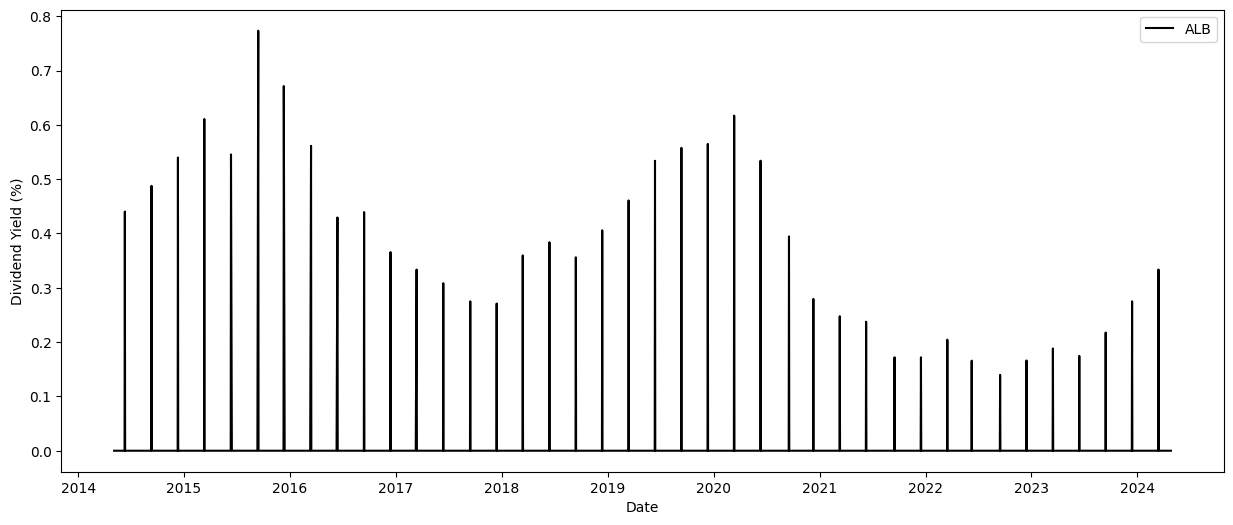

In [16]:
# get share prices and dividend yield data
ticker_all_price = utils.get_historical_share_dividend(share_name, merged_nat_curr)

currency_rate   NaN
share_price     NaN
Name: share_price, dtype: float64


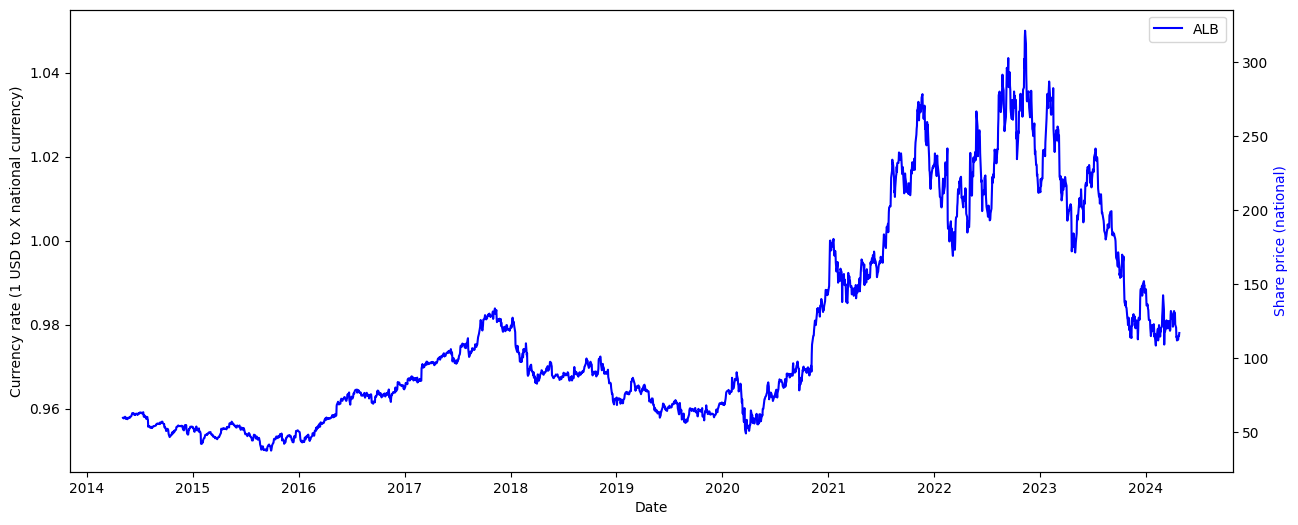

In [17]:
# Pearson's correlation coefficient between share price and USD - national currency rate
utils.get_currency_share_price_correlation(share_name, usd_nat_curr, ticker_all_price)

# Share price and value ratios

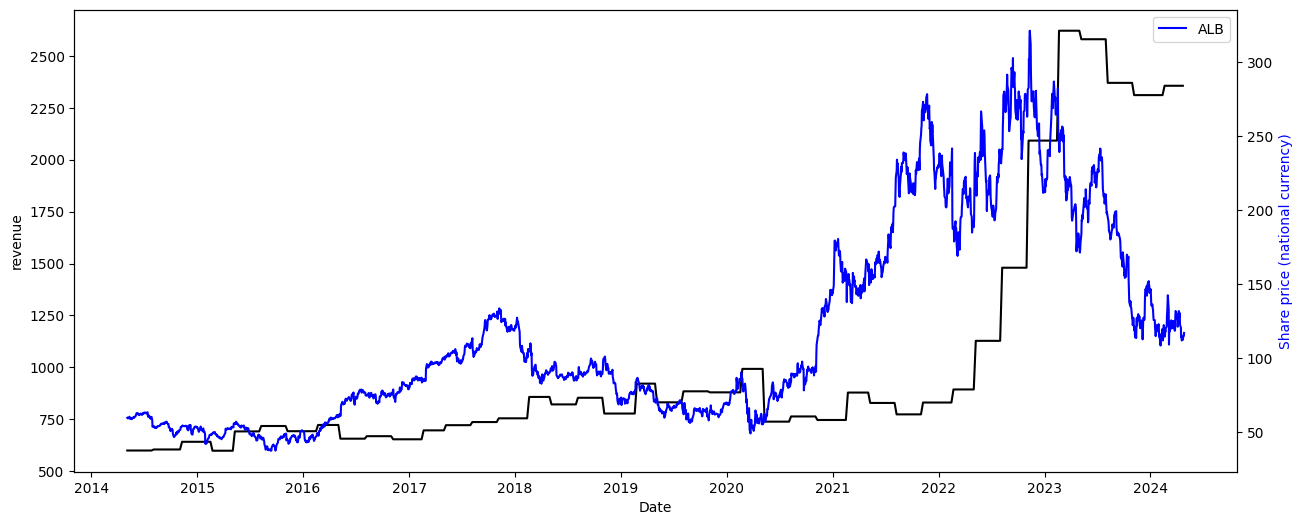

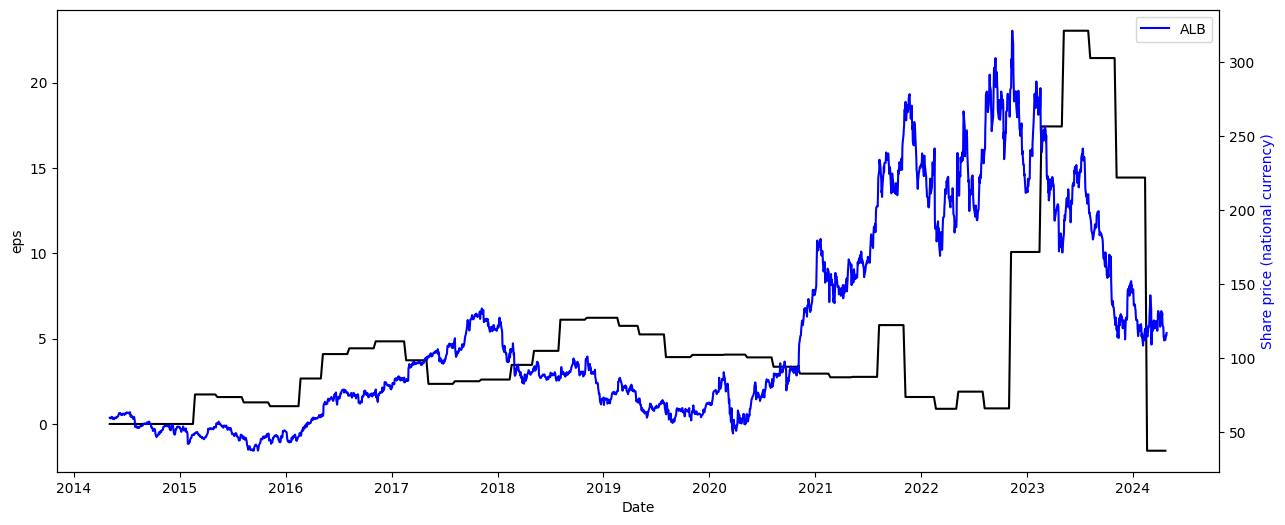

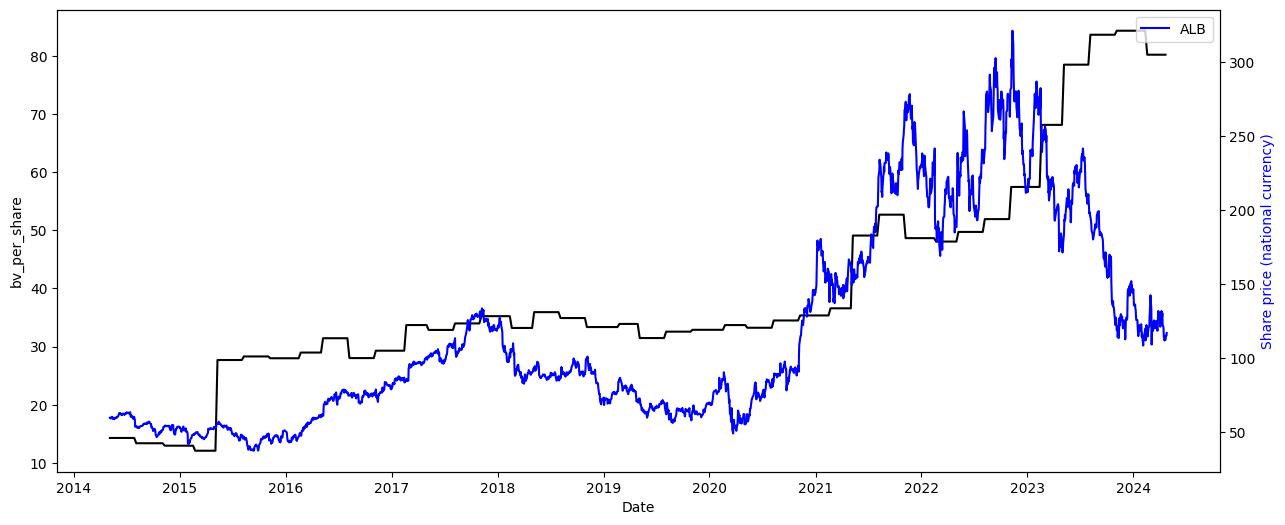

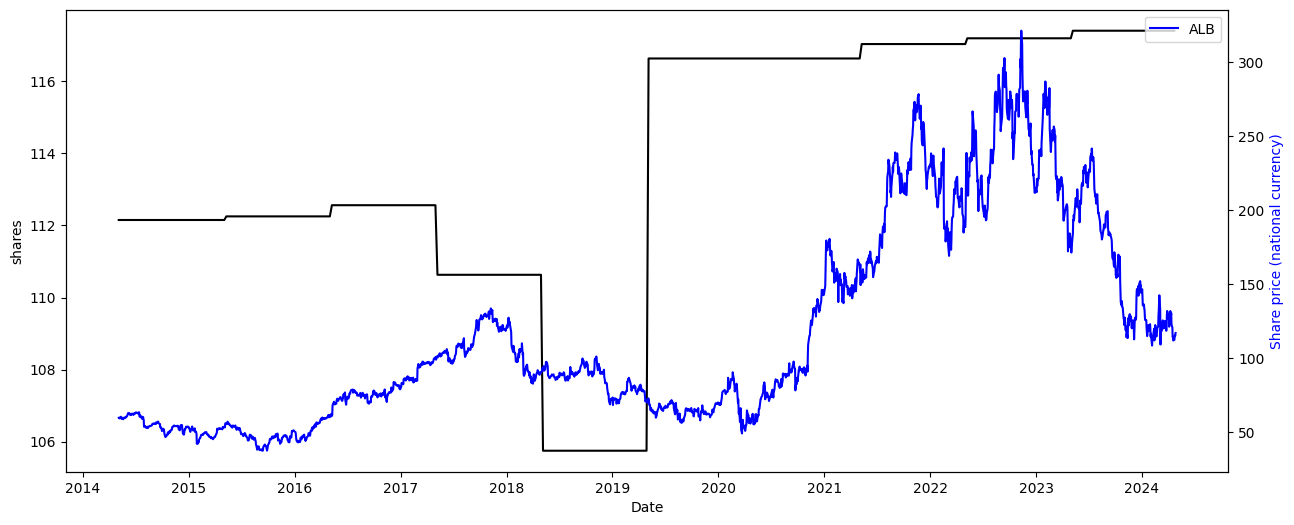

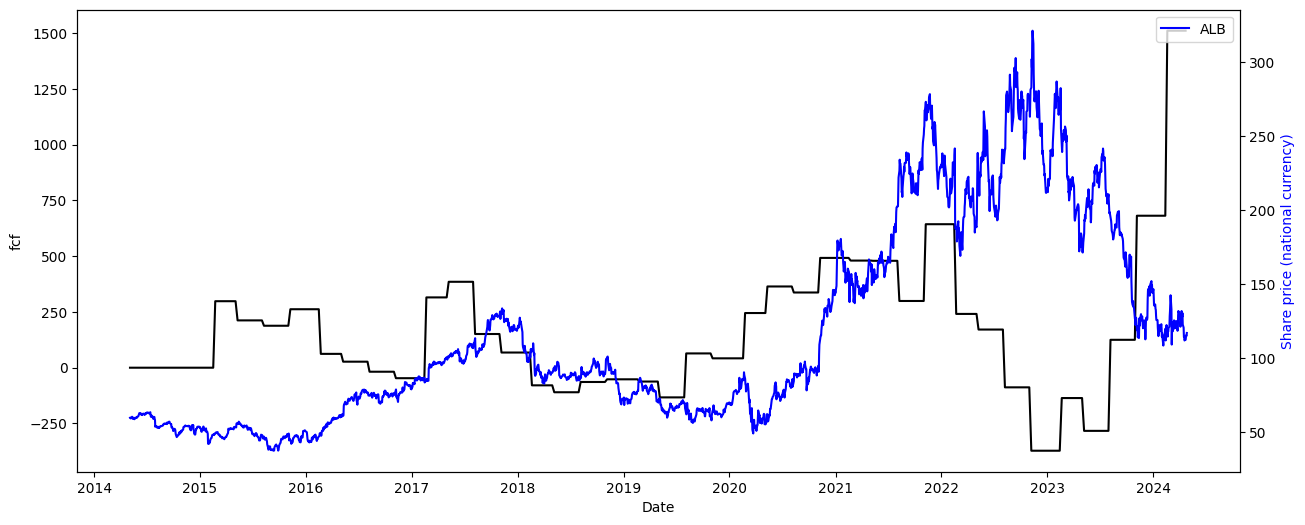

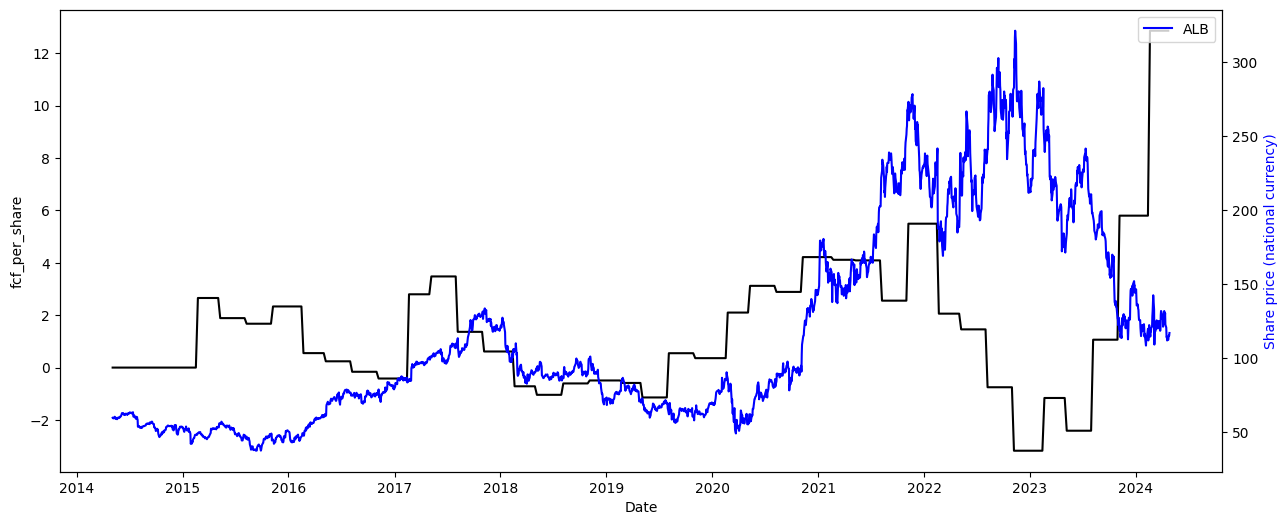

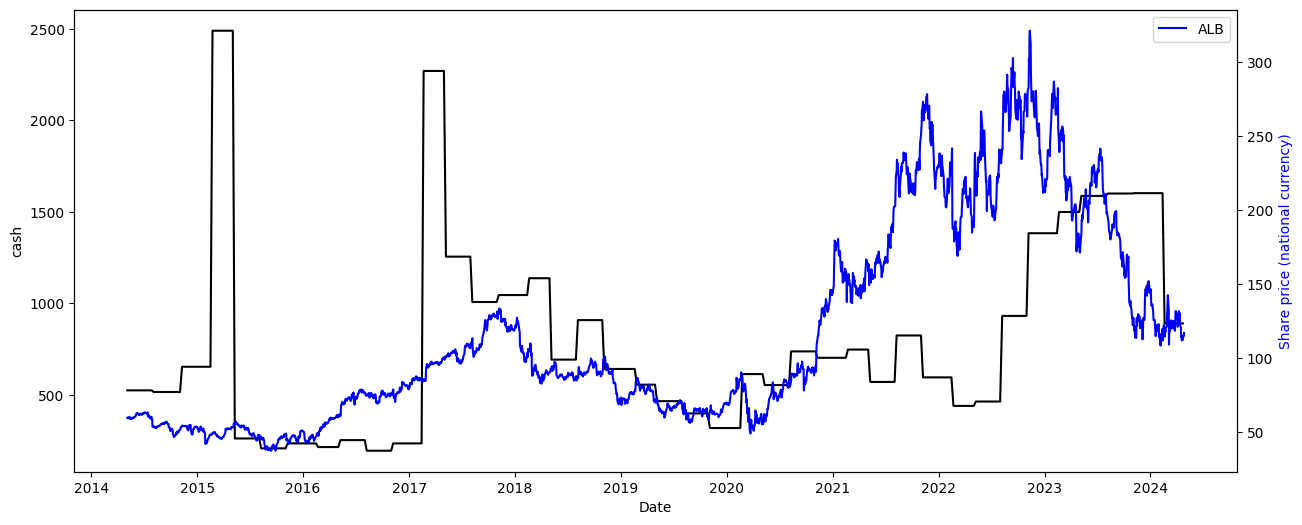

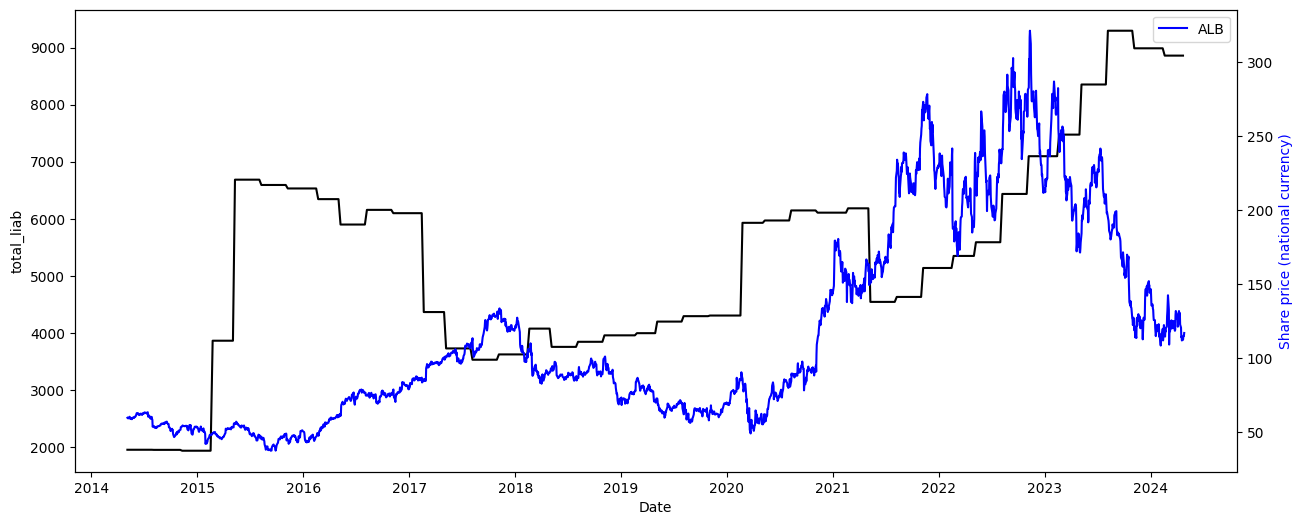

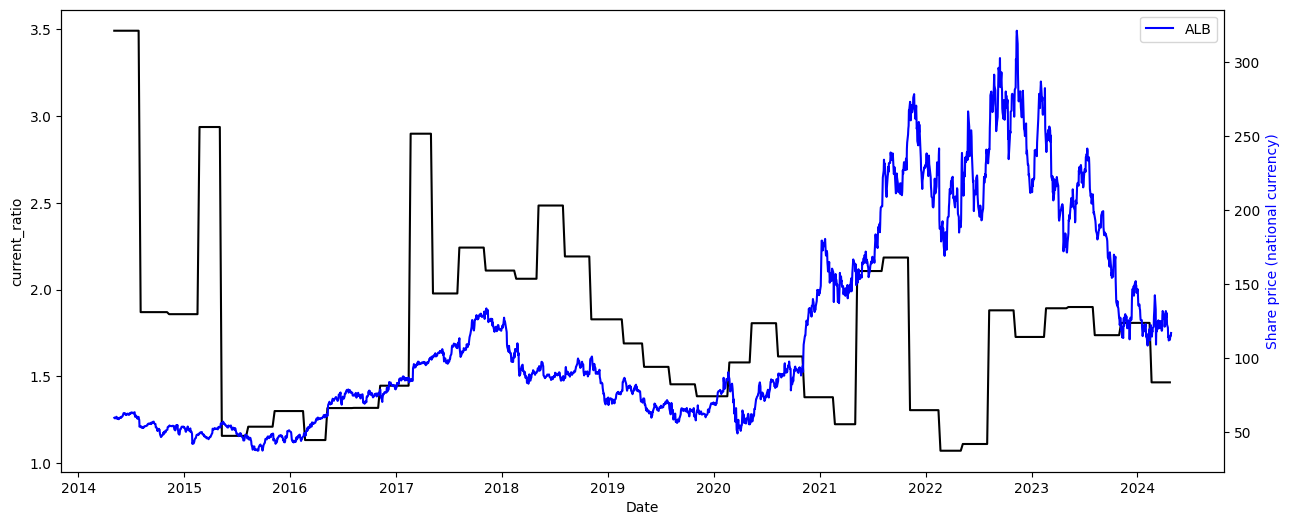

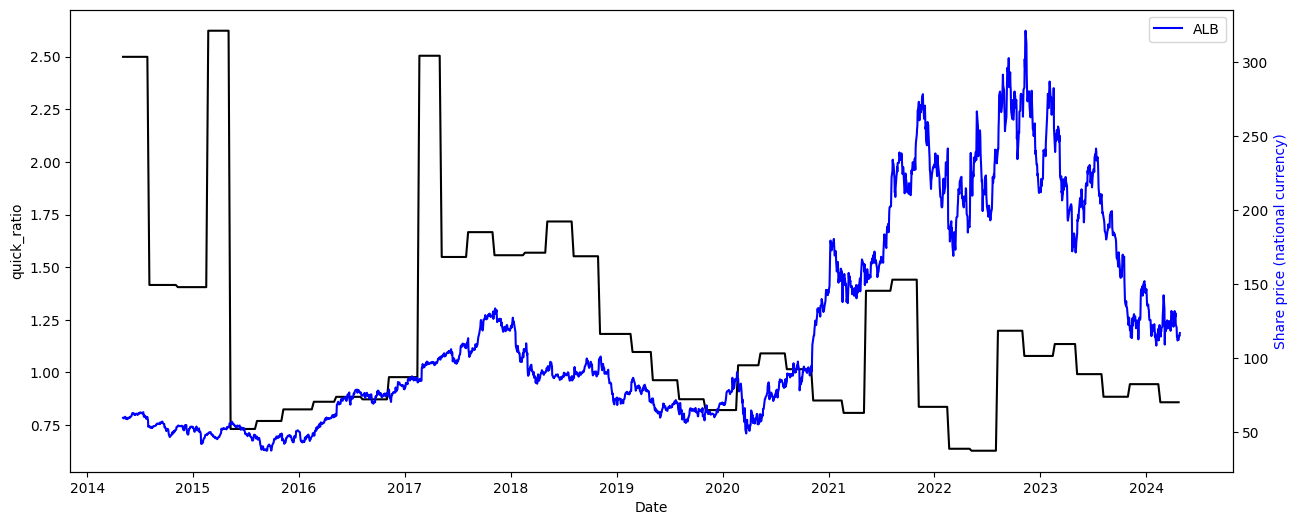

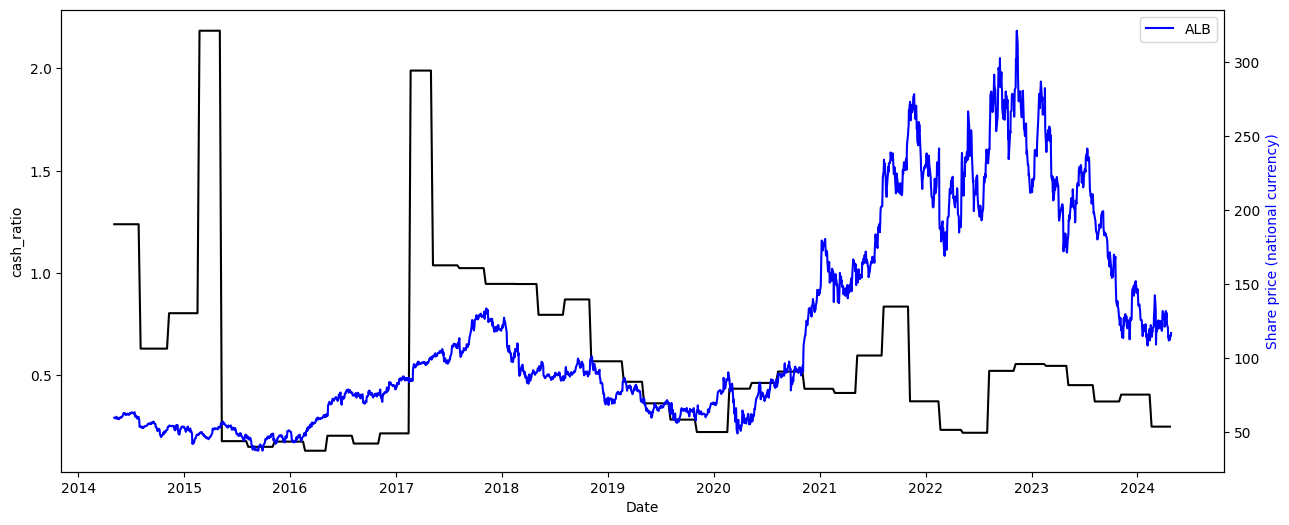

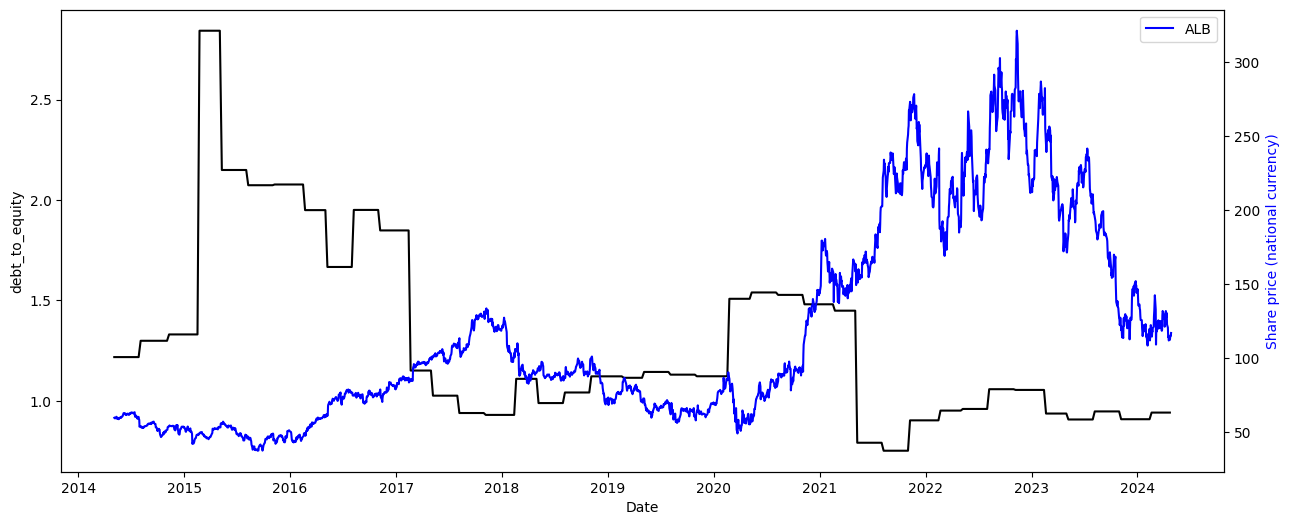

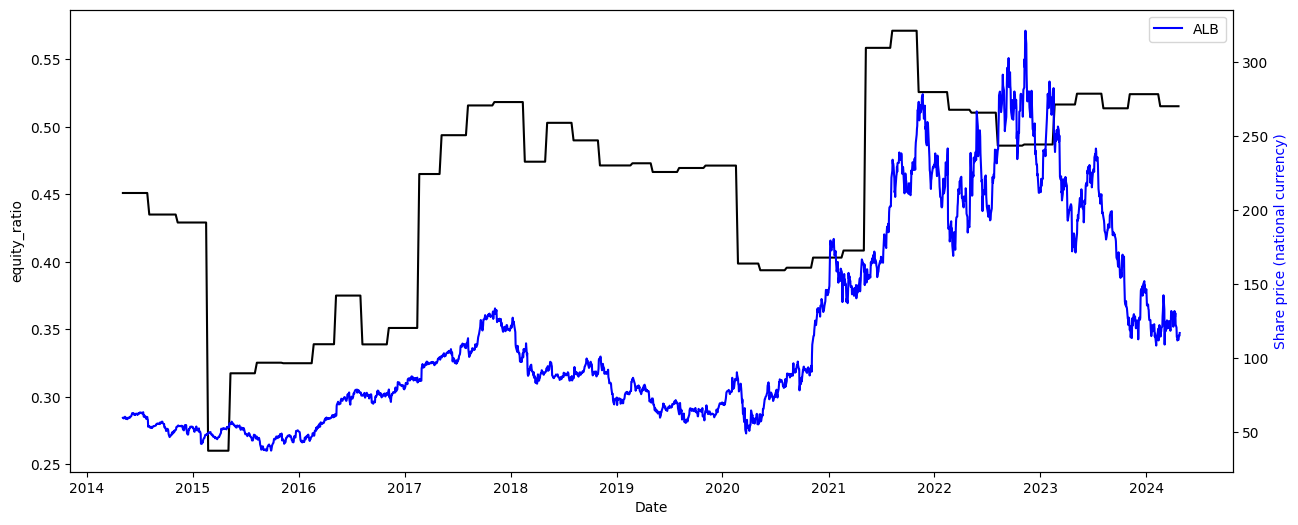

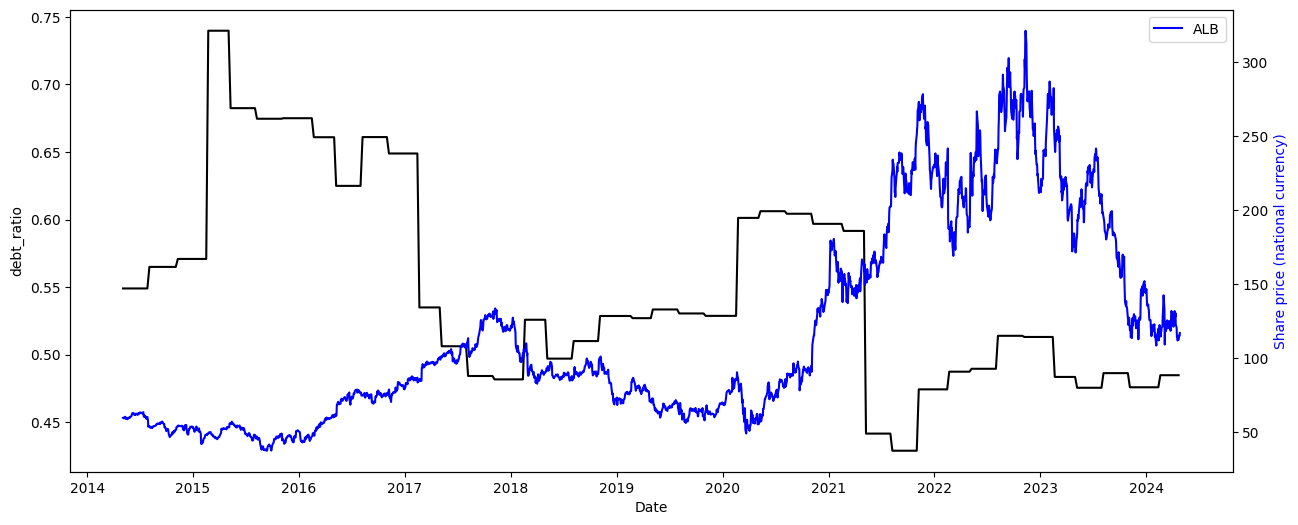

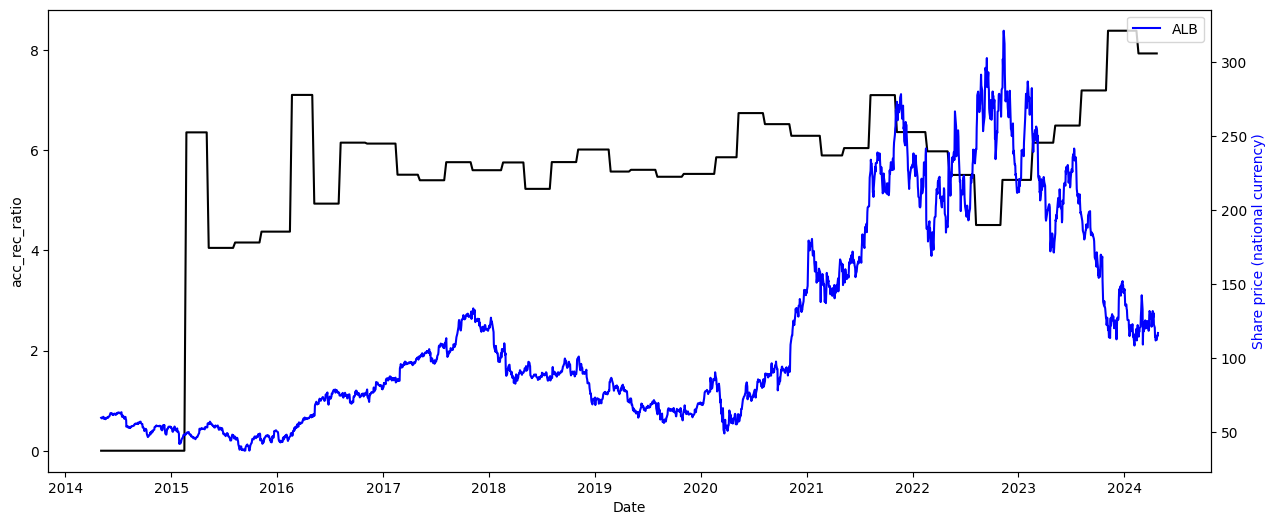

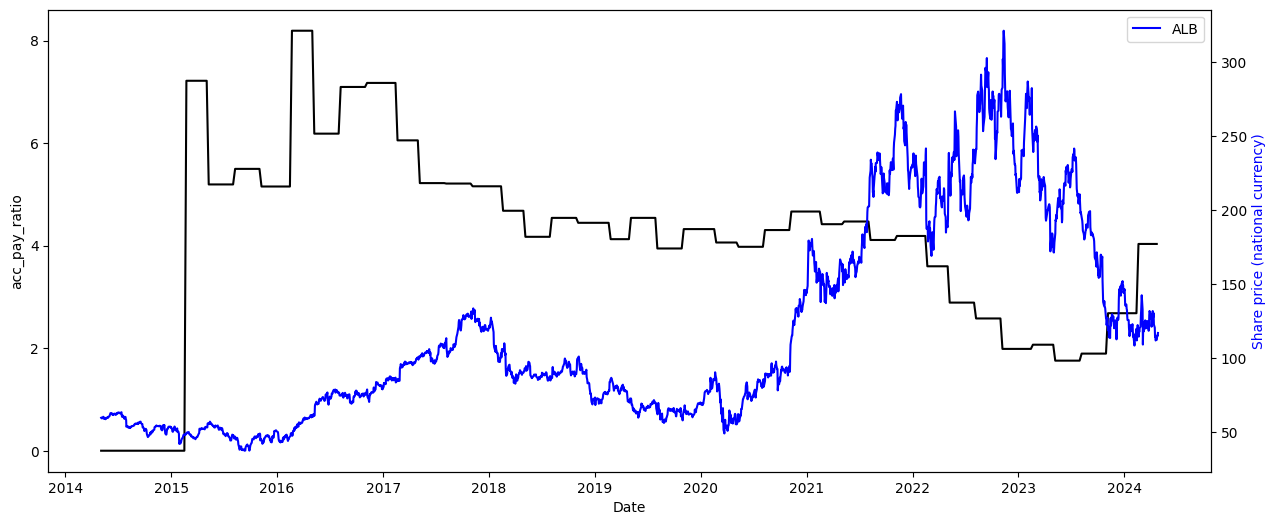

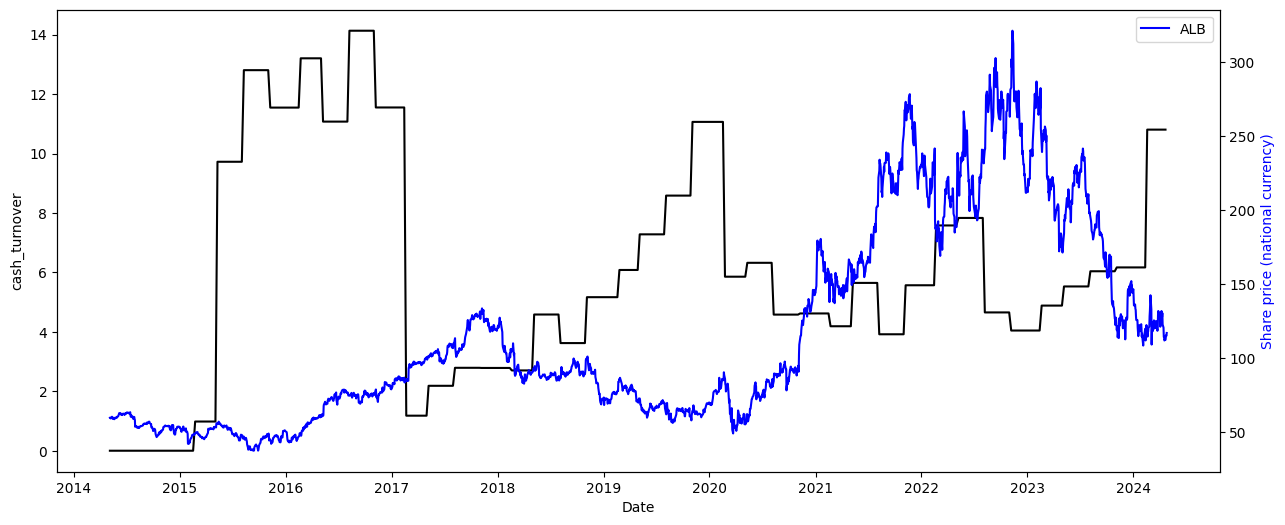

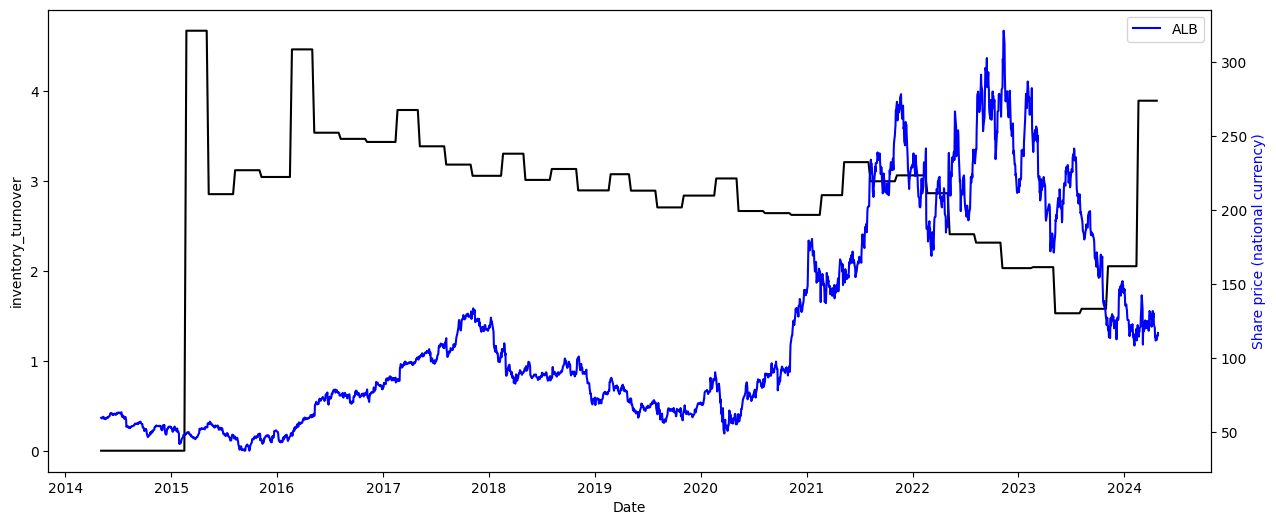

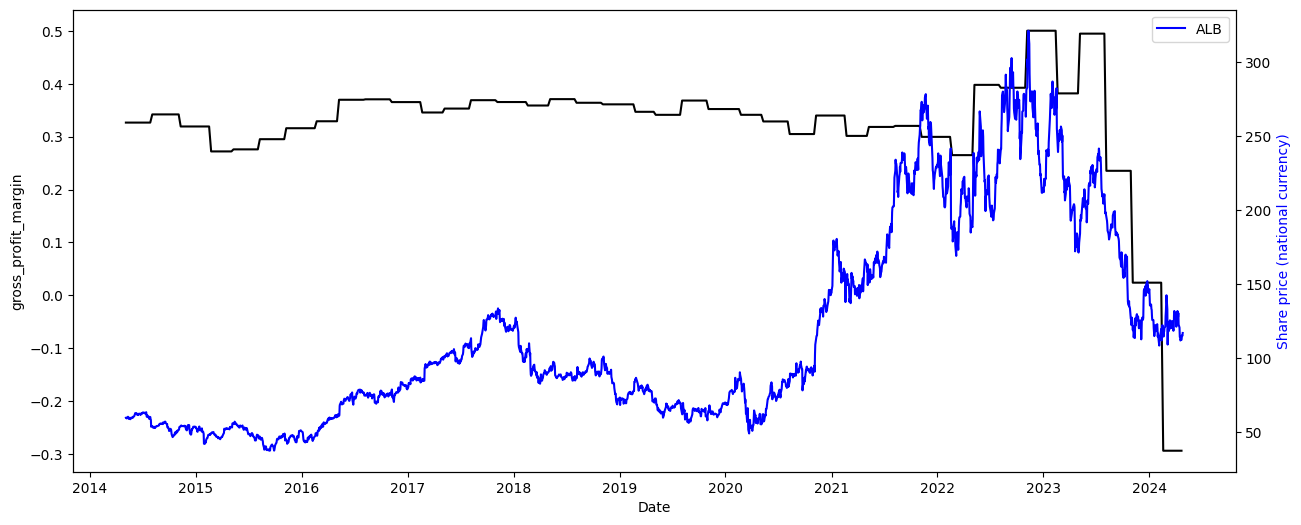

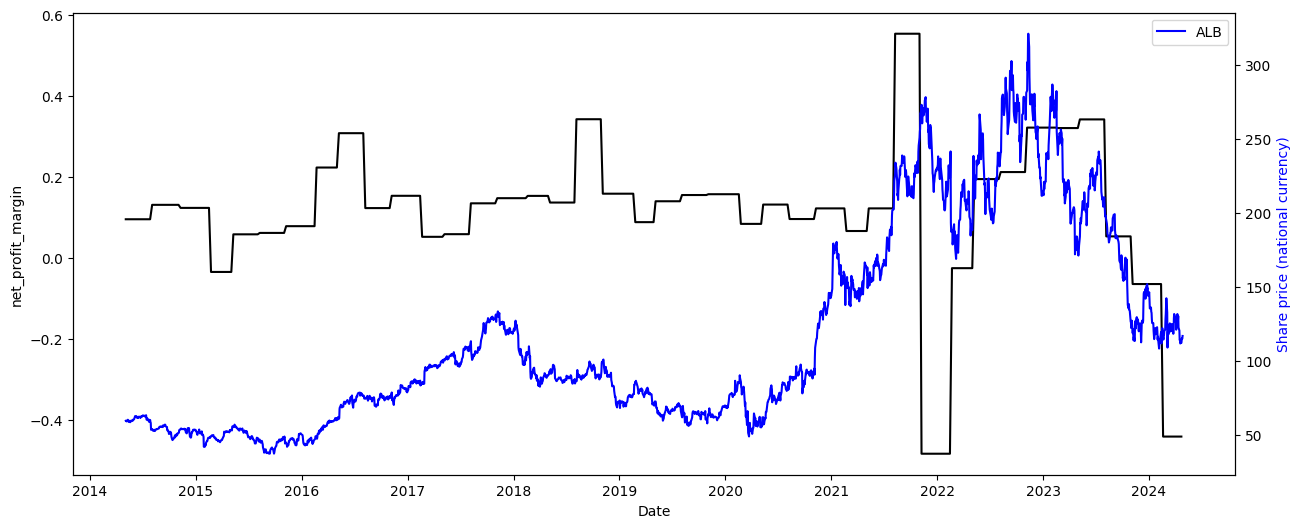

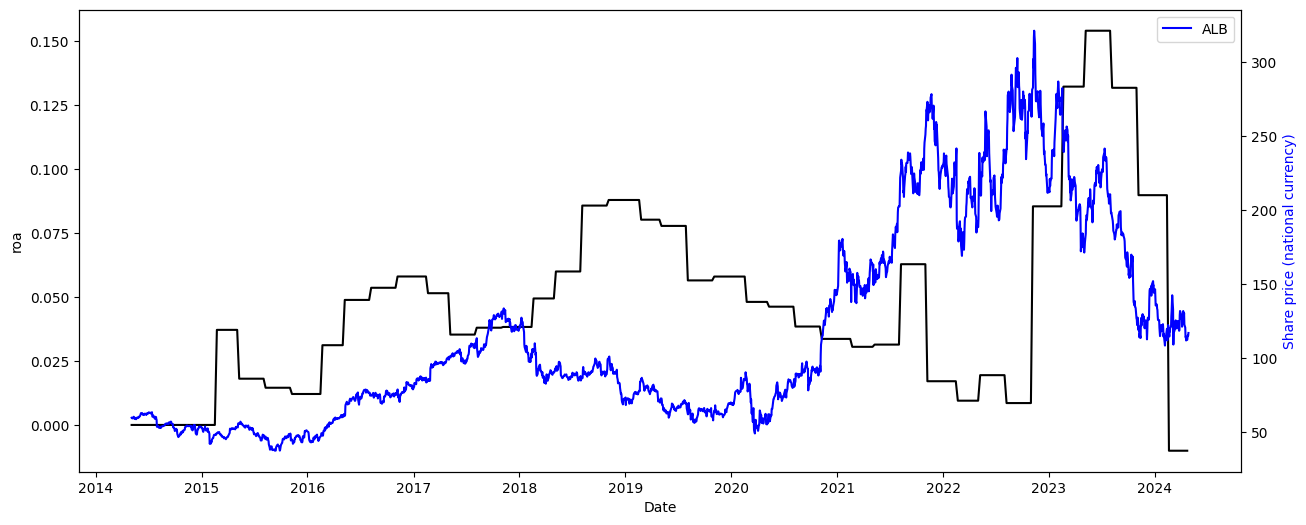

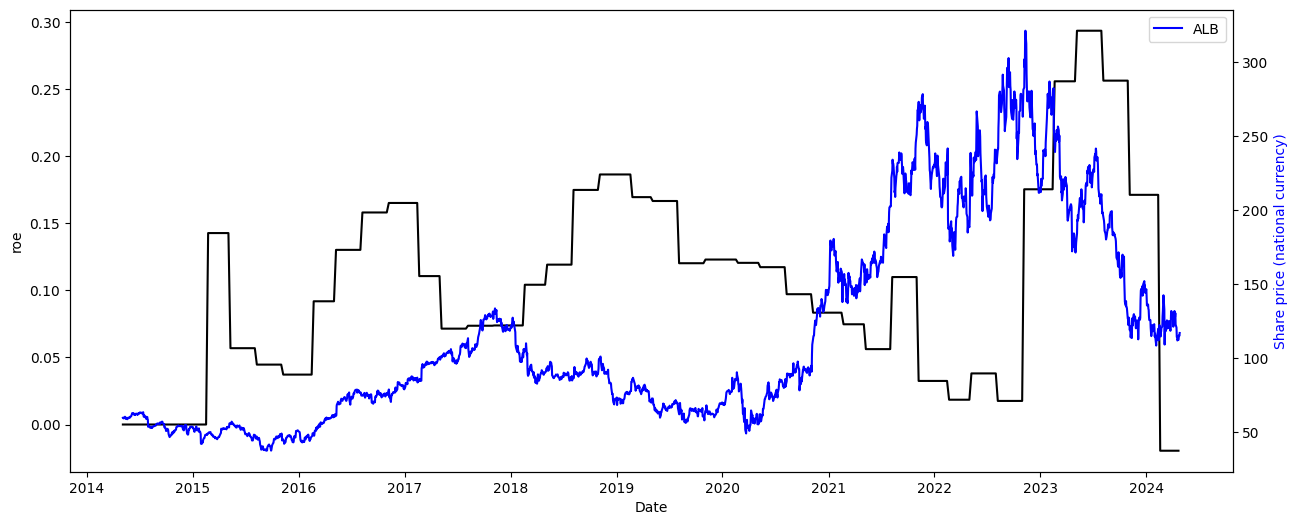

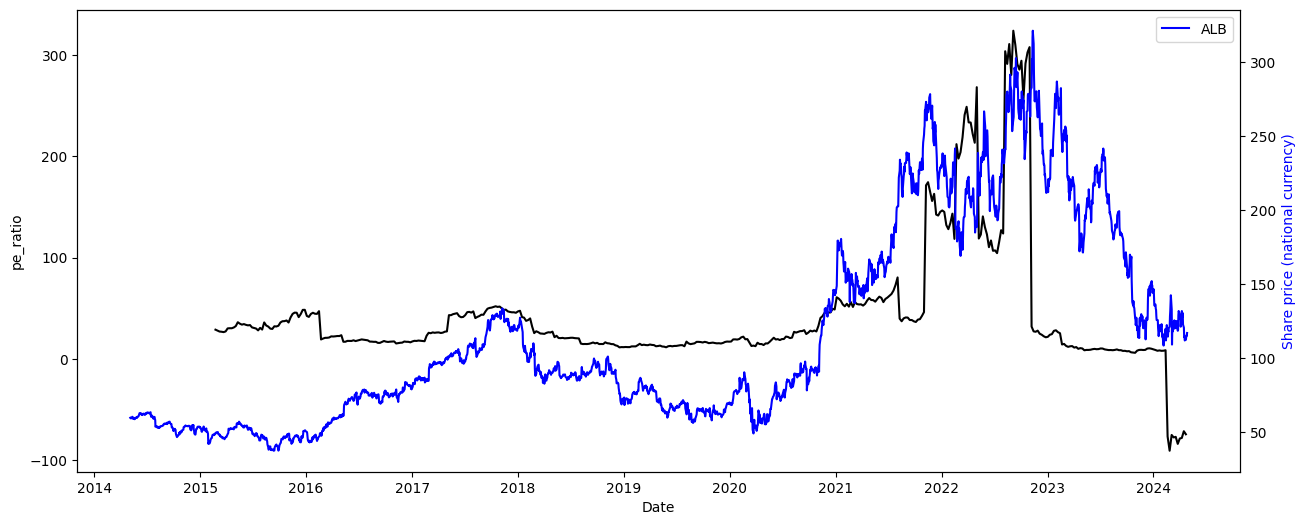

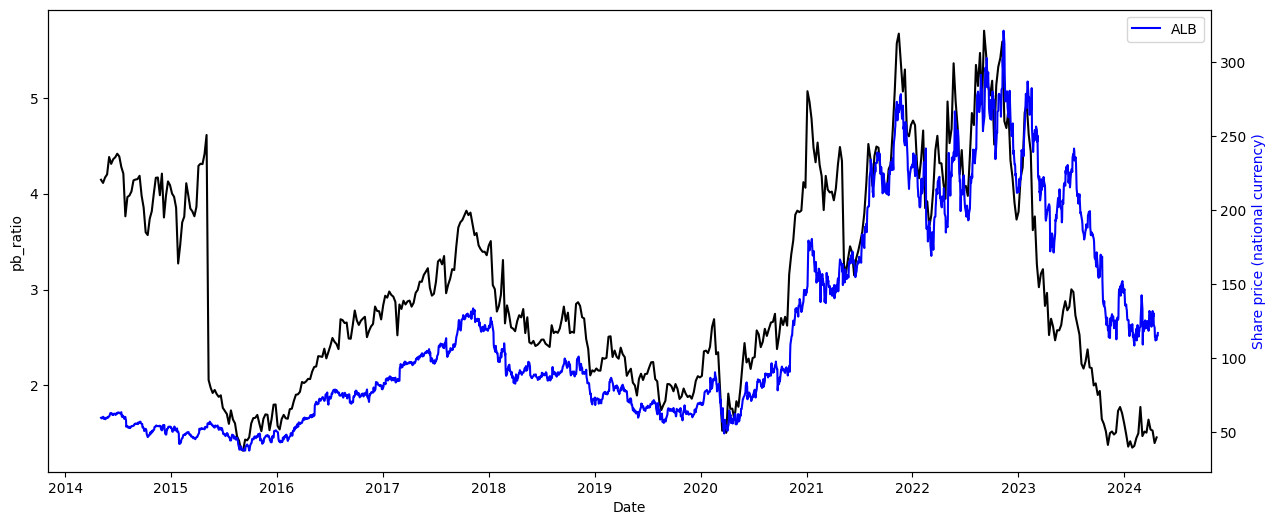

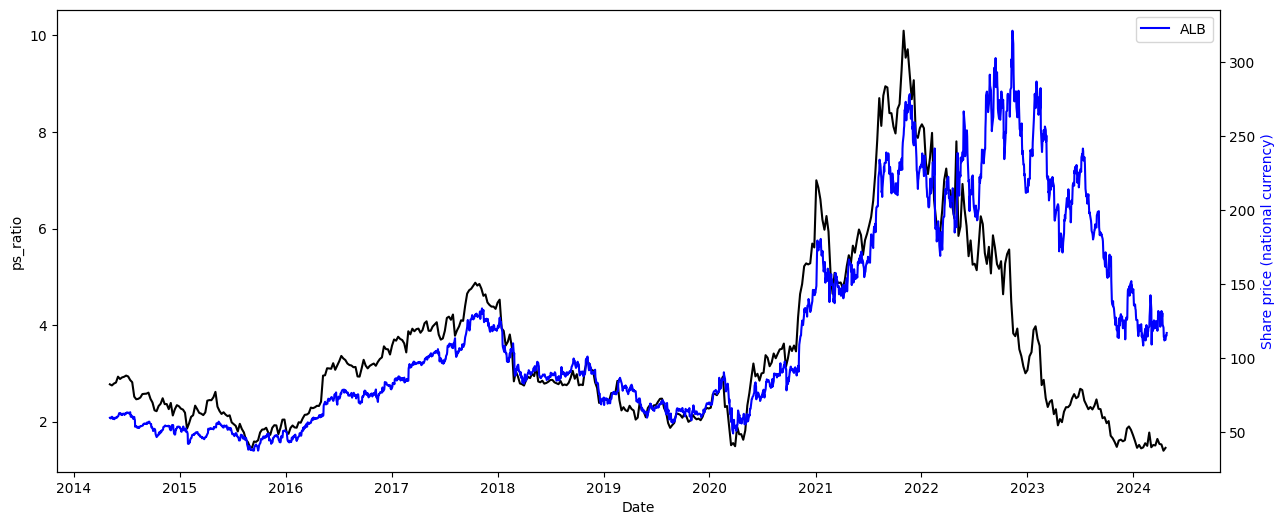

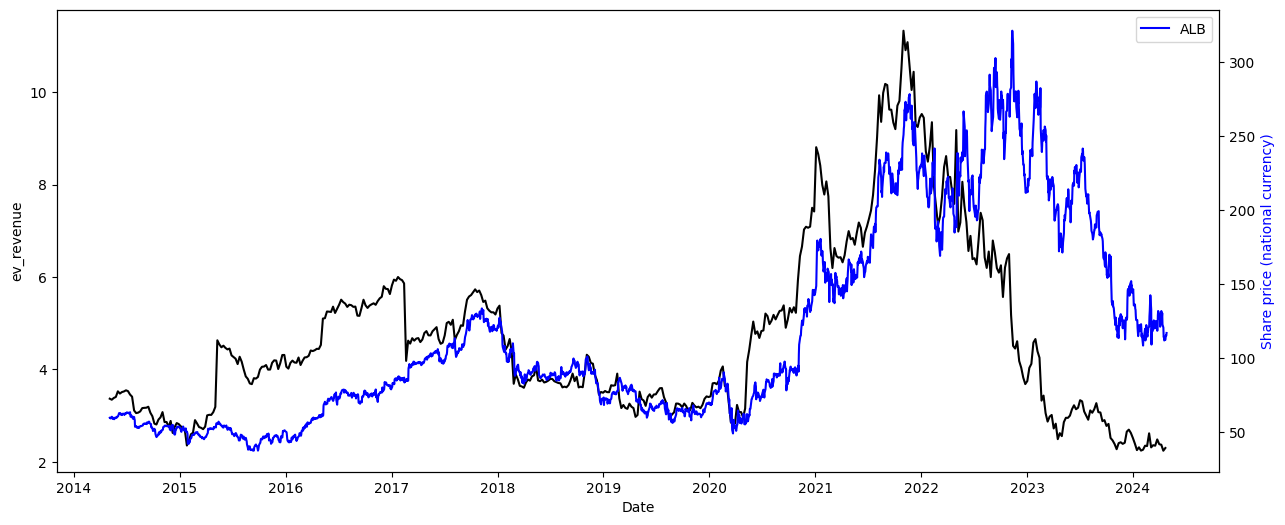

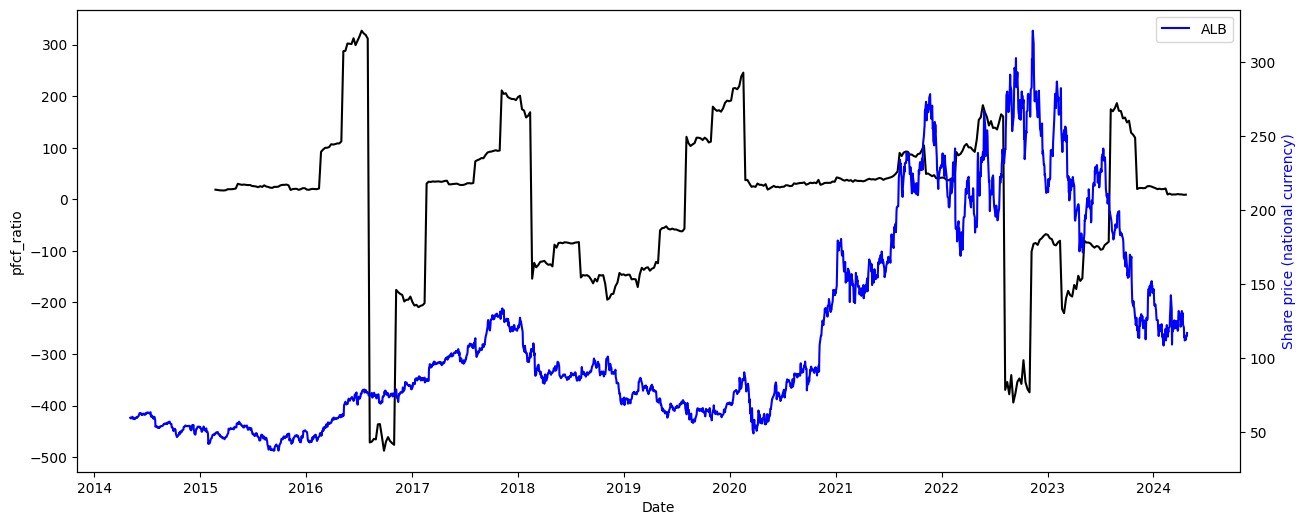

In [18]:
for column in merged_nat_curr.columns[3:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=merged_nat_curr)
    ax2.plot(ticker_all_price.index, ticker_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (national currency)', color='b')

    plt.legend()
    plt.show()

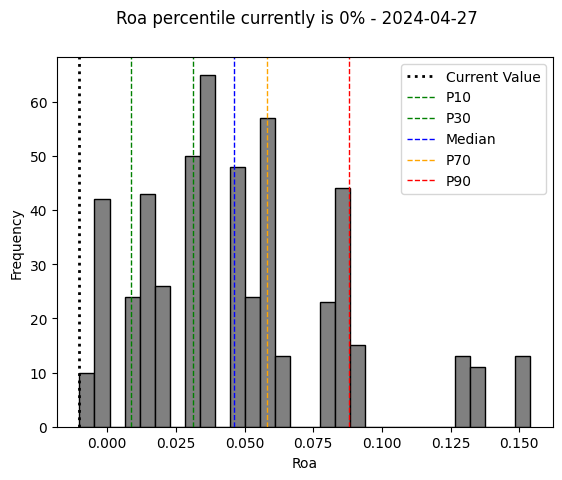

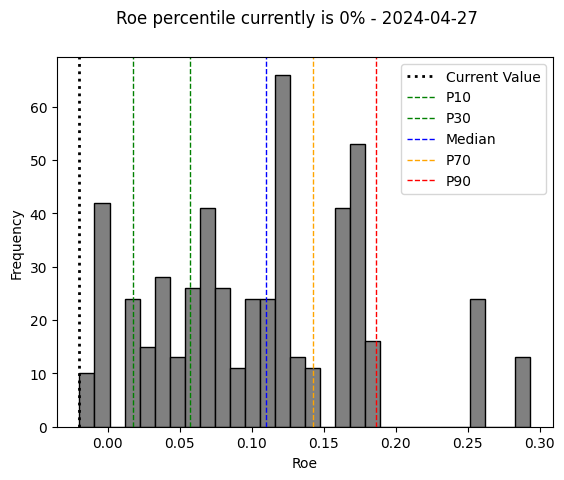

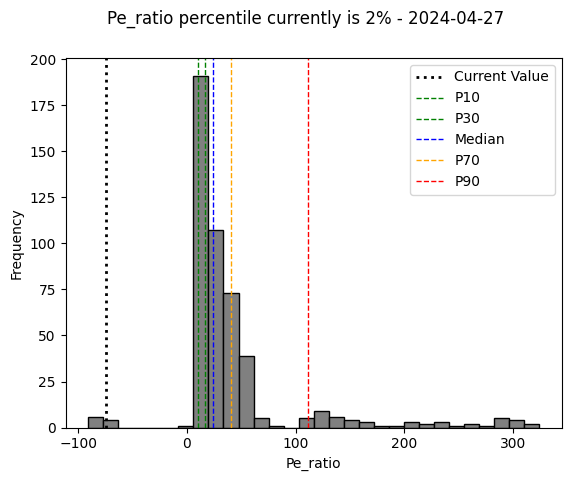

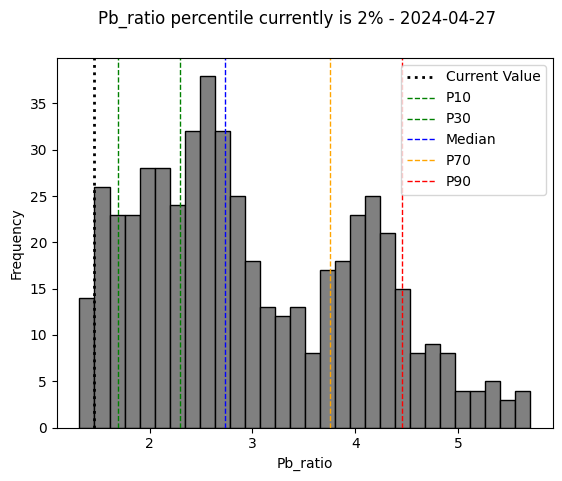

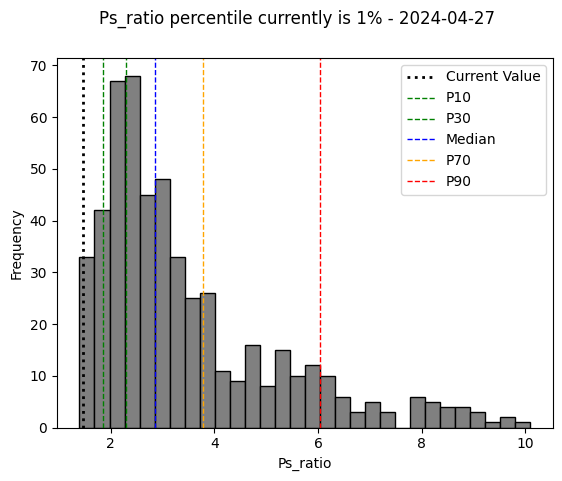

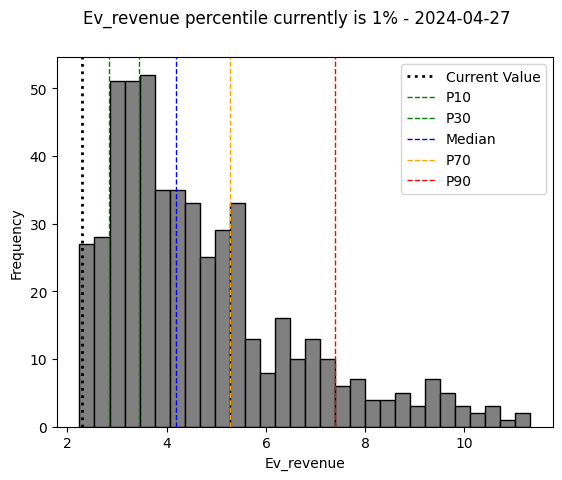

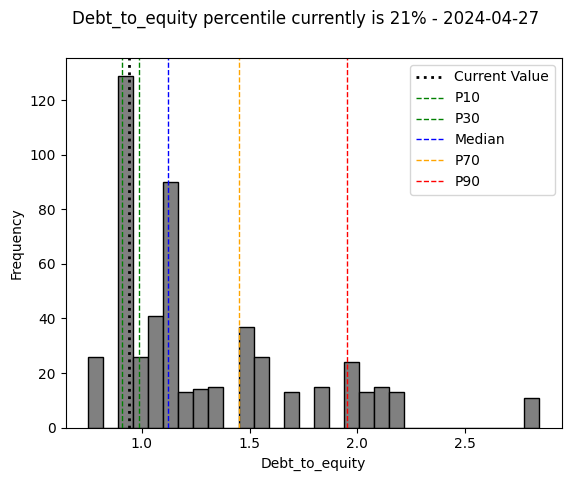

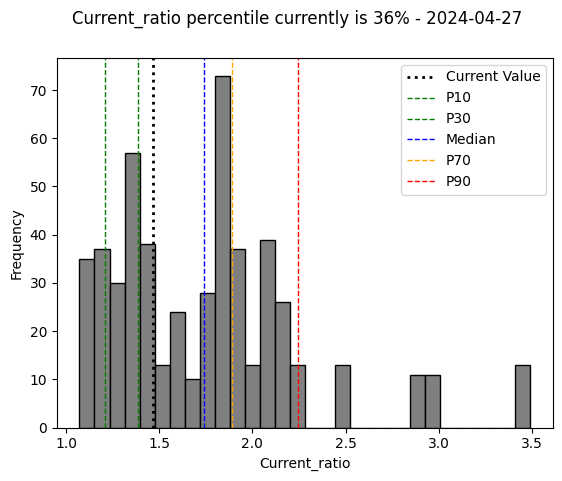

In [19]:
# plot histograms of value parameters
utils.plot_histogram_value_parameters(input_df=merged_nat_curr, extra_parameters=[], owned_shares=owned_shares)

## Calculate correlation between value parameters

In [20]:
# calulate value parameters Pearson's correlation coefficient
pd.DataFrame(merged_nat_curr, columns=['roa', 'roe', 'pe_ratio', 'pb_ratio', 'ps_ratio', 'ev_revenue', 'debt_to_equity', 'current_ratio']).corr()

,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,debt_to_equity,current_ratio
roa,1.000000,0.972040,-0.409540,-0.287672,-0.222598,-0.284710,-0.293650,0.084342
roe,0.972040,1.000000,-0.469359,-0.334256,-0.284015,-0.302657,-0.093387,0.044973
pe_ratio,-0.409540,-0.469359,1.000000,0.671878,0.612114,0.589086,-0.156675,-0.139213
pb_ratio,-0.287672,-0.334256,0.671878,1.000000,0.744484,0.606381,-0.242588,0.231447
ps_ratio,-0.222598,-0.284015,0.612114,0.744484,1.000000,0.953935,-0.364395,-0.031004
ev_revenue,-0.284710,-0.302657,0.589086,0.606381,0.953935,1.000000,-0.158580,-0.216463
debt_to_equity,-0.293650,-0.093387,-0.156675,-0.242588,-0.364395,-0.158580,1.000000,-0.187886
current_ratio,0.084342,0.044973,-0.139213,0.231447,-0.031004,-0.216463,-0.187886,1.000000


0 timestemos have been found!


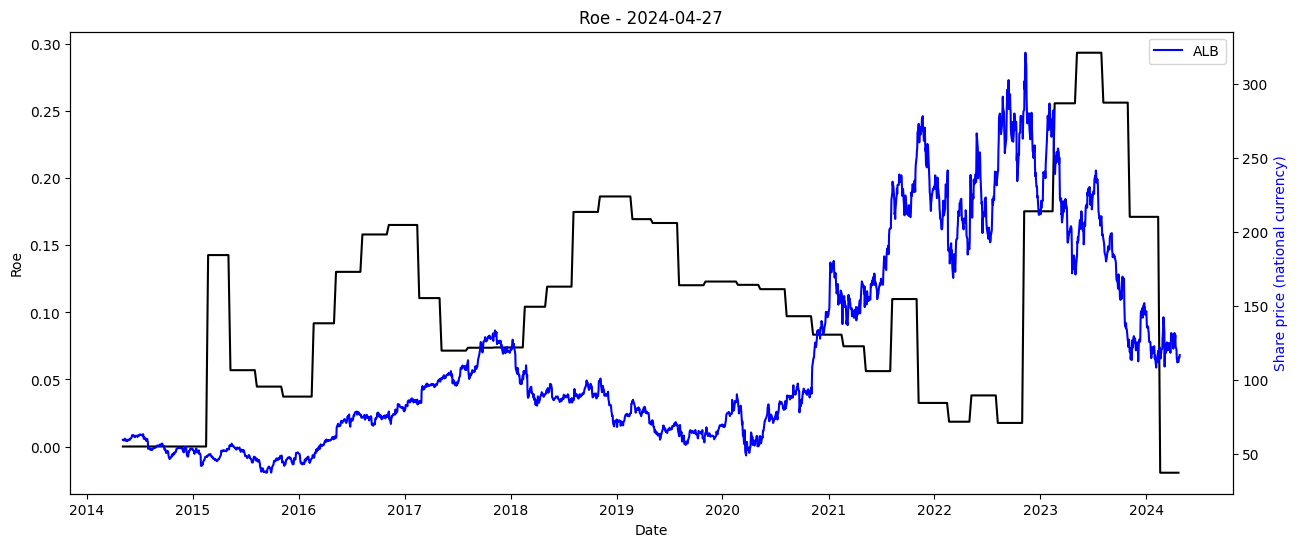

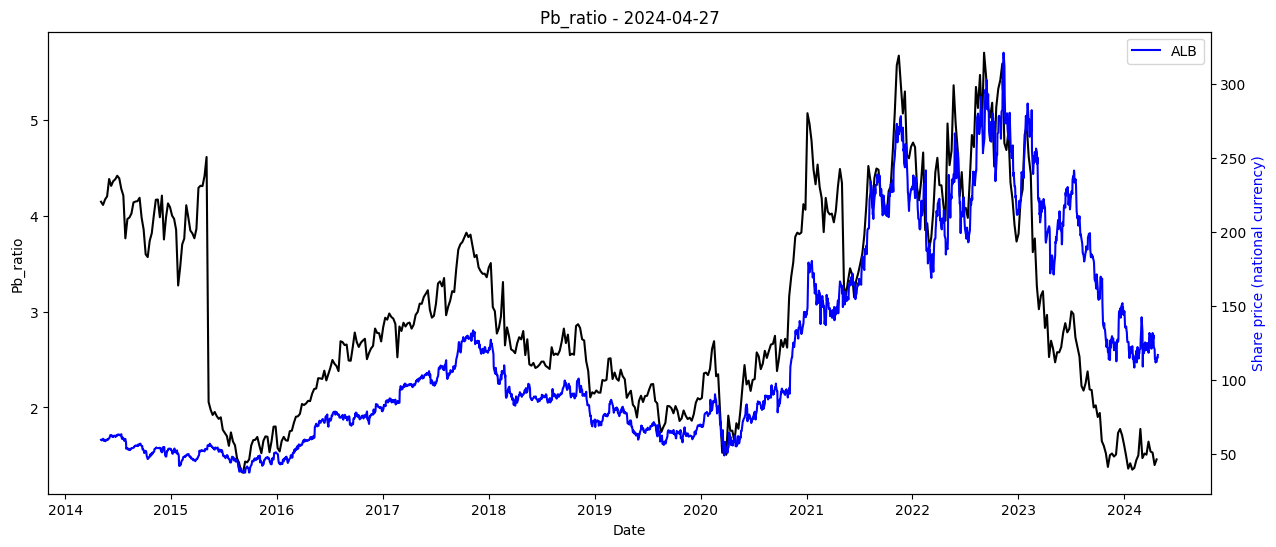

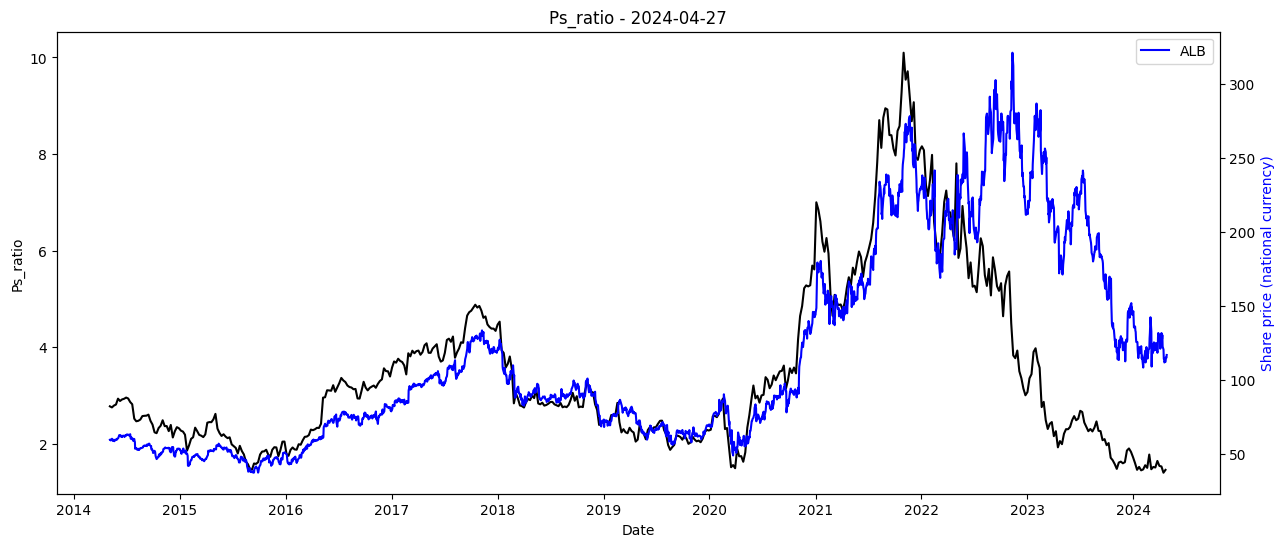

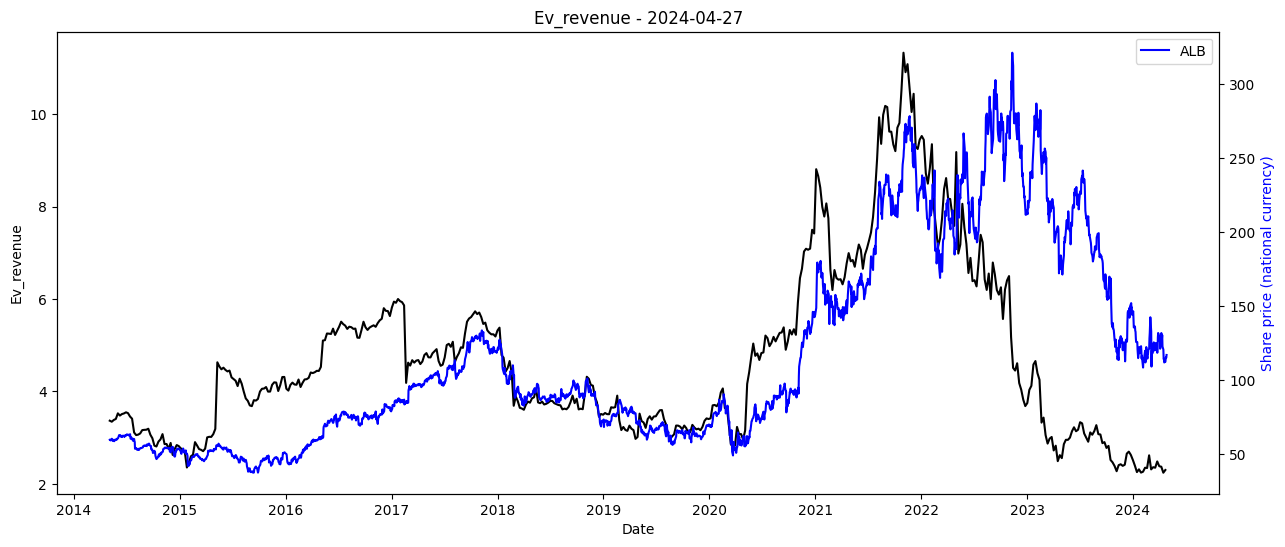

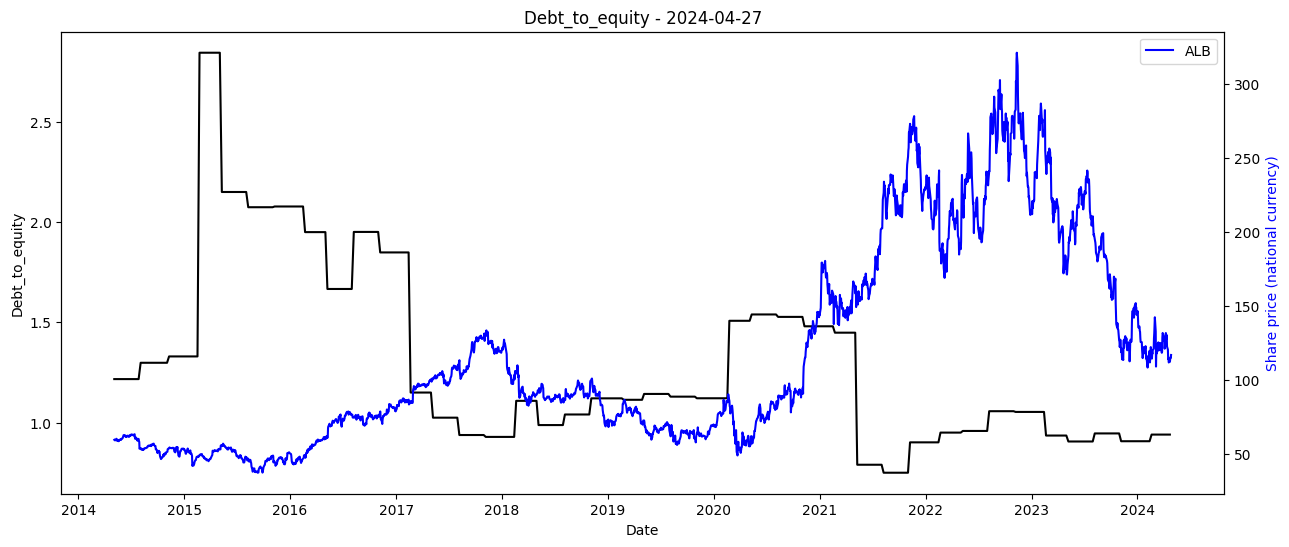

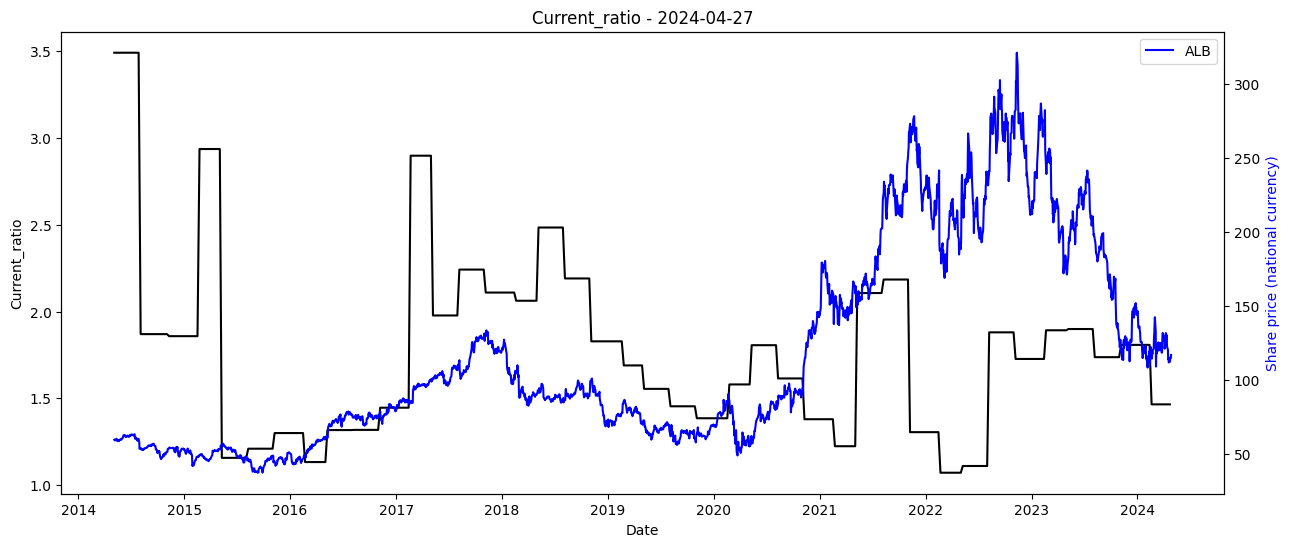

In [21]:
# plot value parameters in time and identify similar events
utils.get_historical_analouges(
    input_df=merged_nat_curr,
    ticker_all_price=ticker_all_price,
    share_name=share_name,
    tolerance=0.2,
    owned_shares=owned_shares
    )